Importing libraries:

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

Assigning dataset:

In [89]:
df = pd.read_excel("merc.xlsx")

In [90]:
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


We want the model to predict a price depending on the features of the cars. Thus our dependent variable will be "price" data.

When we examine the dataset, the "transmission" column has string data. First, we will encode this column.

In [91]:
df["transmission"].unique() #to be able to see how many there are transmission types

array(['Automatic', 'Manual', 'Semi-Auto', 'Other'], dtype=object)

In [92]:
from sklearn import preprocessing

In [93]:
ohe = preprocessing.OneHotEncoder()

In [94]:
transmission = df["transmission"].values

In [95]:
transmission = ohe.fit_transform(transmission.reshape(-1,1)).toarray()

In [96]:
transmission

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

Now, we will tranform this transmission data into dataframe type (with column names).

In [97]:
transmission_df = pd.DataFrame(transmission, columns=["automatic", "manual", "other", "semi-auto"])

In [98]:
transmission_df.head()

,automatic,manual,other,semi-auto
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


Then, we have to delete original transmission column from dataset and add the encoded transmission data into it.

In [99]:
df = df.drop("transmission", axis=1)

In [100]:
df.head()

,year,price,mileage,tax,mpg,engineSize
0,2005,5200,63000,325,32.1,1.8
1,2017,34948,27000,20,61.4,2.1
2,2016,49948,6200,555,28.0,5.5
3,2016,61948,16000,325,30.4,4.0
4,2016,73948,4000,325,30.1,4.0


In [101]:
for i in transmission_df:
    df[i] = transmission_df[i]

In [102]:
df.head()

,year,price,mileage,tax,mpg,engineSize,automatic,manual,other,semi-auto
0,2005,5200,63000,325,32.1,1.8,1.0,0.0,0.0,0.0
1,2017,34948,27000,20,61.4,2.1,1.0,0.0,0.0,0.0
2,2016,49948,6200,555,28.0,5.5,1.0,0.0,0.0,0.0
3,2016,61948,16000,325,30.4,4.0,1.0,0.0,0.0,0.0
4,2016,73948,4000,325,30.1,4.0,1.0,0.0,0.0,0.0


Now, we will be able to send these data into the model. Before this process, we have to decide the dependent variable and features. For this scenario, we would like the model to process the features and then predict a price for the car. Thus, our dependent variable is the "price" data. The other data will be the features. 

In [103]:
x = df.drop("price", axis=1).values
y = df["price"].values

Now, we can split the data. We will set the test size to 33%.

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

We have to scale x_train data and x_test data to be able to process by algorithm.

In [106]:
from sklearn import preprocessing

In [107]:
scaler = preprocessing.MinMaxScaler()

In [108]:
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

Now we can build a model. We will use keras library.

In [109]:
from keras.models import Sequential
from keras.layers import Dense

In [110]:
model = Sequential()

In [111]:
model.add(Dense(9, activation="relu")) #this is first hidden layer and contains 9 neurons
model.add(Dense(10, activation="relu")) #second hidden layer
model.add(Dense(9, activation="relu")) #third hidden layer

model.add(Dense(1)) #output layer

model.compile(optimizer="adam", loss="mse")

We have created a model. Now, we can give the data into the model and train it.

In [112]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=250, epochs=300)

Epoch 1/300
36/36 [==============================] - 1s 8ms/step - loss: 755067712.0000 - val_loss: 740504384.0000
Epoch 2/300
36/36 [==============================] - 0s 5ms/step - loss: 755048576.0000 - val_loss: 740482432.0000
Epoch 3/300
36/36 [==============================] - 0s 4ms/step - loss: 755014080.0000 - val_loss: 740429312.0000
Epoch 4/300
36/36 [==============================] - 0s 4ms/step - loss: 754928576.0000 - val_loss: 740297344.0000
Epoch 5/300
36/36 [==============================] - 0s 3ms/step - loss: 754717120.0000 - val_loss: 739979264.0000
Epoch 6/300
36/36 [==============================] - 0s 4ms/step - loss: 754238592.0000 - val_loss: 739280960.0000
Epoch 7/300
36/36 [==============================] - 0s 4ms/step - loss: 753249792.0000 - val_loss: 737941248.0000
Epoch 8/300
36/36 [==============================] - 0s 4ms/step - loss: 751471424.0000 - val_loss: 735659328.0000
Epoch 9/300
36/36 [==============================] - 0s 4ms/step - loss: 7485825

36/36 [==============================] - 0s 5ms/step - loss: 118159176.0000 - val_loss: 114899320.0000
Epoch 72/300
36/36 [==============================] - 0s 4ms/step - loss: 117867048.0000 - val_loss: 114613280.0000
Epoch 73/300
36/36 [==============================] - 0s 4ms/step - loss: 117583712.0000 - val_loss: 114342528.0000
Epoch 74/300
36/36 [==============================] - 0s 3ms/step - loss: 117291528.0000 - val_loss: 114055168.0000
Epoch 75/300
36/36 [==============================] - 0s 4ms/step - loss: 117011320.0000 - val_loss: 113778808.0000
Epoch 76/300
36/36 [==============================] - 0s 3ms/step - loss: 116723168.0000 - val_loss: 113527928.0000
Epoch 77/300
36/36 [==============================] - 0s 4ms/step - loss: 116448768.0000 - val_loss: 113247528.0000
Epoch 78/300
36/36 [==============================] - 0s 3ms/step - loss: 116173608.0000 - val_loss: 112973920.0000
Epoch 79/300
36/36 [==============================] - 0s 4ms/step - loss: 115898424.0

36/36 [==============================] - 0s 3ms/step - loss: 97822640.0000 - val_loss: 94790632.0000
Epoch 142/300
36/36 [==============================] - 0s 4ms/step - loss: 97447056.0000 - val_loss: 94412640.0000
Epoch 143/300
36/36 [==============================] - 0s 4ms/step - loss: 97097840.0000 - val_loss: 94025600.0000
Epoch 144/300
36/36 [==============================] - 0s 5ms/step - loss: 96700064.0000 - val_loss: 93663568.0000
Epoch 145/300
36/36 [==============================] - 0s 6ms/step - loss: 96308616.0000 - val_loss: 93286072.0000
Epoch 146/300
36/36 [==============================] - 0s 5ms/step - loss: 95926384.0000 - val_loss: 92865560.0000
Epoch 147/300
36/36 [==============================] - 0s 5ms/step - loss: 95519824.0000 - val_loss: 92458792.0000
Epoch 148/300
36/36 [==============================] - 0s 4ms/step - loss: 95117704.0000 - val_loss: 92068488.0000
Epoch 149/300
36/36 [==============================] - 0s 4ms/step - loss: 94703888.0000 - val

36/36 [==============================] - 0s 4ms/step - loss: 60455988.0000 - val_loss: 56642884.0000
Epoch 213/300
36/36 [==============================] - 0s 4ms/step - loss: 59934396.0000 - val_loss: 56131392.0000
Epoch 214/300
36/36 [==============================] - 0s 4ms/step - loss: 59400932.0000 - val_loss: 55563960.0000
Epoch 215/300
36/36 [==============================] - 0s 4ms/step - loss: 58894480.0000 - val_loss: 55079468.0000
Epoch 216/300
36/36 [==============================] - 0s 4ms/step - loss: 58415176.0000 - val_loss: 54599696.0000
Epoch 217/300
36/36 [==============================] - 0s 4ms/step - loss: 57945864.0000 - val_loss: 54114004.0000
Epoch 218/300
36/36 [==============================] - 0s 4ms/step - loss: 57485812.0000 - val_loss: 53661256.0000
Epoch 219/300
36/36 [==============================] - 0s 4ms/step - loss: 57054560.0000 - val_loss: 53212872.0000
Epoch 220/300
36/36 [==============================] - 0s 4ms/step - loss: 56647892.0000 - val

36/36 [==============================] - 0s 4ms/step - loss: 41316412.0000 - val_loss: 37732912.0000
Epoch 284/300
36/36 [==============================] - 0s 4ms/step - loss: 41150708.0000 - val_loss: 37643704.0000
Epoch 285/300
36/36 [==============================] - 0s 4ms/step - loss: 41030008.0000 - val_loss: 37508856.0000
Epoch 286/300
36/36 [==============================] - 0s 4ms/step - loss: 40899044.0000 - val_loss: 37443108.0000
Epoch 287/300
36/36 [==============================] - 0s 4ms/step - loss: 40786068.0000 - val_loss: 37300380.0000
Epoch 288/300
36/36 [==============================] - 0s 4ms/step - loss: 40660048.0000 - val_loss: 37171836.0000
Epoch 289/300
36/36 [==============================] - 0s 4ms/step - loss: 40550548.0000 - val_loss: 37074156.0000
Epoch 290/300
36/36 [==============================] - 0s 4ms/step - loss: 40448924.0000 - val_loss: 36970148.0000
Epoch 291/300
36/36 [==============================] - 0s 4ms/step - loss: 40327412.0000 - val

The model has trained. Now we want to see the loss data for evaluation.

In [113]:
loss_data = pd.DataFrame(model.history.history)

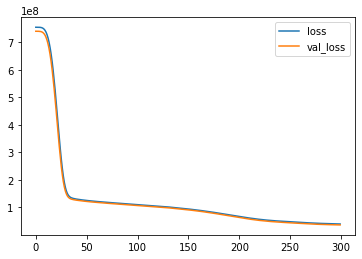

In [114]:
loss_data.plot()

We can see that the loss data and validation loss data have reached nearly 0. Thus we can say that model has worked properly. Now, we want the model to predict with x_test data. Then we will compare the prediction data with the y_test data.

In [115]:
y_pred = model.predict(X_test)

Then we create a function that plots the y_test and y_pred values.

In [116]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return

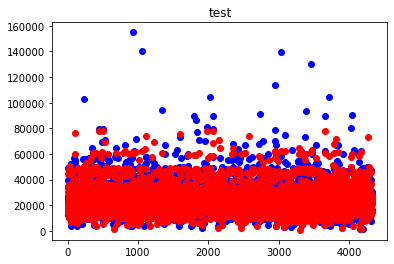

In [117]:
plotGraph(y_test, y_pred, "test")